In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import mne
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [2]:
dataPath1 = 'C:/Users/the_m/Google Drive/NeuroResearch/data/MarkScalpEEGFile1.edf'
dataPath2 = 'C:/Users/the_m/Google Drive/NeuroResearch/data/MarkScalpEEGFile2.edf'

In [3]:
raw = [mne.io.read_raw_edf(dataPath1, preload=True), mne.io.read_raw_edf(dataPath2, preload=True)]

Extracting EDF parameters from C:\Users\the_m\Google Drive\NeuroResearch\data\MarkScalpEEGFile1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1363455  =      0.000 ...  5325.996 secs...
Extracting EDF parameters from C:\Users\the_m\Google Drive\NeuroResearch\data\MarkScalpEEGFile2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 997375  =      0.000 ...  3895.996 secs...


<ipython-input-3-afcbc11820a3>:1: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  raw = [mne.io.read_raw_edf(dataPath1, preload=True), mne.io.read_raw_edf(dataPath2, preload=True)]
<ipython-input-3-afcbc11820a3>:1: RuntimeWarning: Omitted 30 annotation(s) that were outside data range.
  raw = [mne.io.read_raw_edf(dataPath1, preload=True), mne.io.read_raw_edf(dataPath2, preload=True)]


In [4]:
raw[0].info, raw[1].info

(<Info | 7 non-empty values
  bads: []
  ch_names: C3, C4, O1, O2, A1, A2, Cz, F3, F4, F7, F8, Fz, Fp1, Fp2, Fpz, ...
  chs: 50 EEG
  custom_ref_applied: False
  highpass: 0.0 Hz
  lowpass: 128.0 Hz
  meas_date: 2020-12-18 09:26:25 UTC
  nchan: 50
  projs: []
  sfreq: 256.0 Hz
 >,
 <Info | 7 non-empty values
  bads: []
  ch_names: C3, C4, O1, O2, A1, A2, Cz, F3, F4, F7, F8, Fz, Fp1, Fp2, Fpz, ...
  chs: 50 EEG
  custom_ref_applied: False
  highpass: 0.0 Hz
  lowpass: 128.0 Hz
  meas_date: 2020-12-16 14:43:13 UTC
  nchan: 50
  projs: []
  sfreq: 256.0 Hz
 >)

<IPython.core.display.Javascript object>


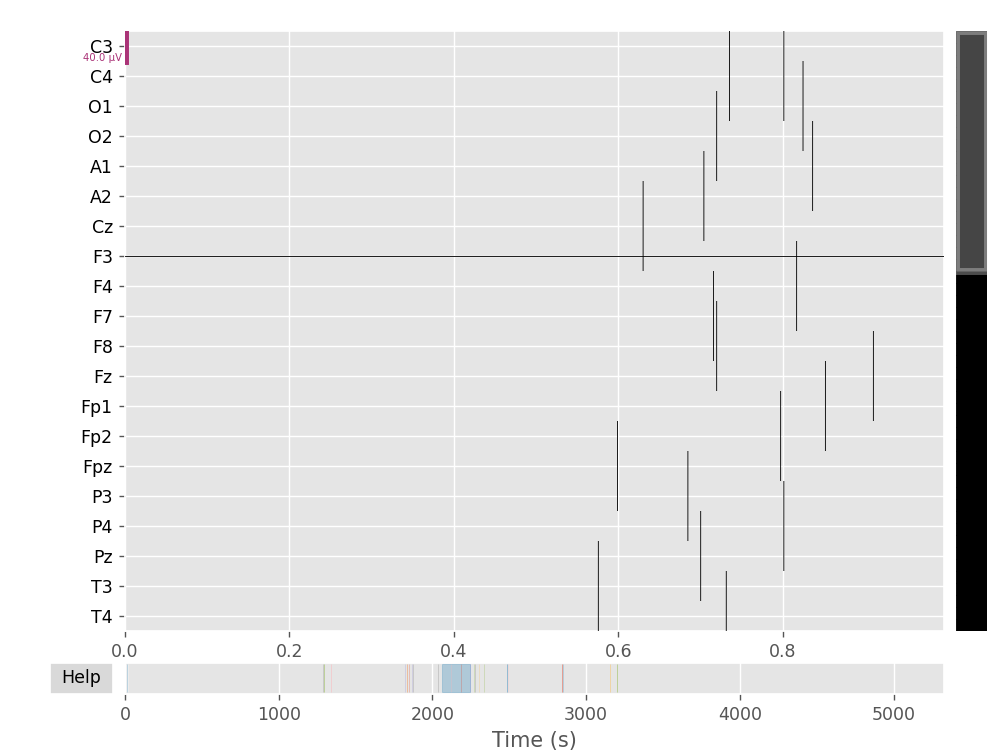

<IPython.core.display.Javascript object>


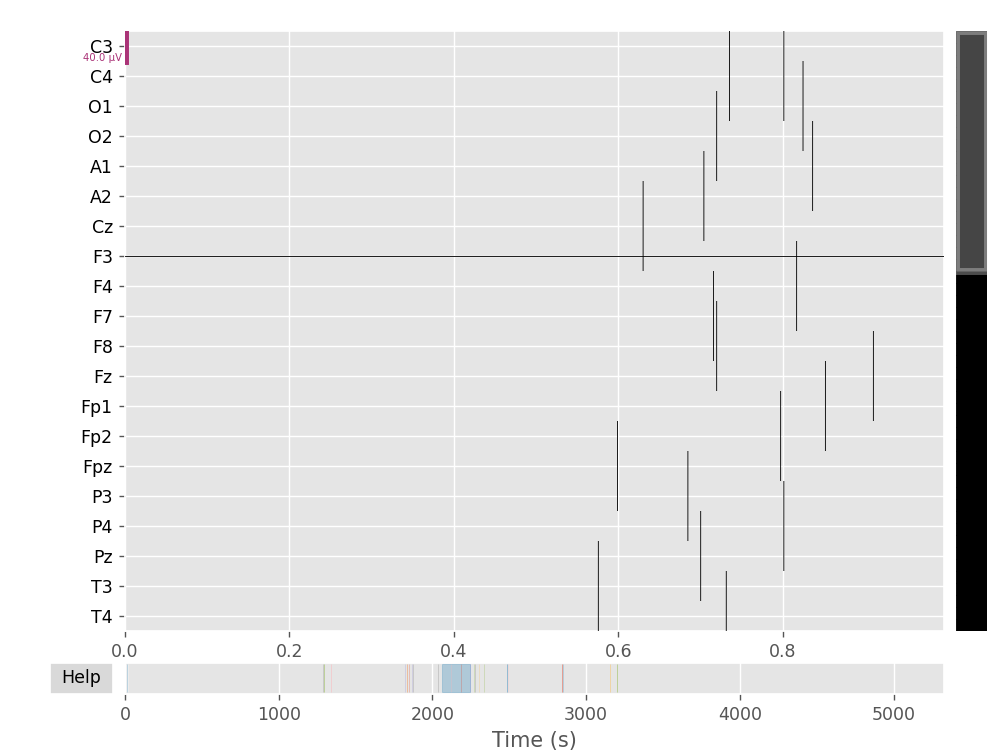

In [5]:
raw[0].plot(duration=1)

<IPython.core.display.Javascript object>


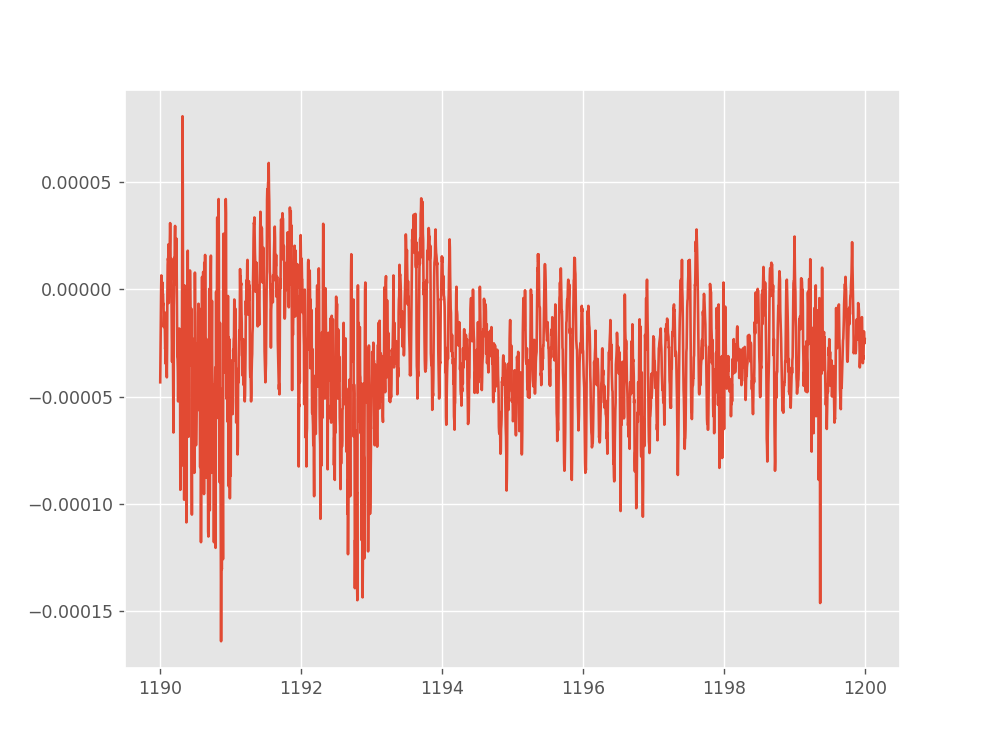

In [6]:
fileIndex = 0
channelName = 'O2'
beginSecond, endSecond = 1190, 1200

sfreq = int(raw[fileIndex].info['sfreq'])
signal, times = raw[fileIndex][channelName, beginSecond * sfreq:endSecond * sfreq]
signal = signal.flatten()

plt.figure()
plt.plot(times,signal);

In [7]:
def embed3(ts, delay0, delay1):
    embedding = np.zeros(shape=(len(ts) - delay0 - delay1,3))
    for i in range(len(ts) - delay0 - delay1):
        embedding[i,:] = np.array((ts[i], ts[i - delay0], ts[i - delay1]))
    return embedding

def embed2(ts, delay):
    embedding = np.zeros(shape=(len(ts) - delay,2))
    for i in range(len(ts) - delay):
        embedding[i,:] = np.array((ts[i], ts[i - delay]))
    return embedding

<IPython.core.display.Javascript object>


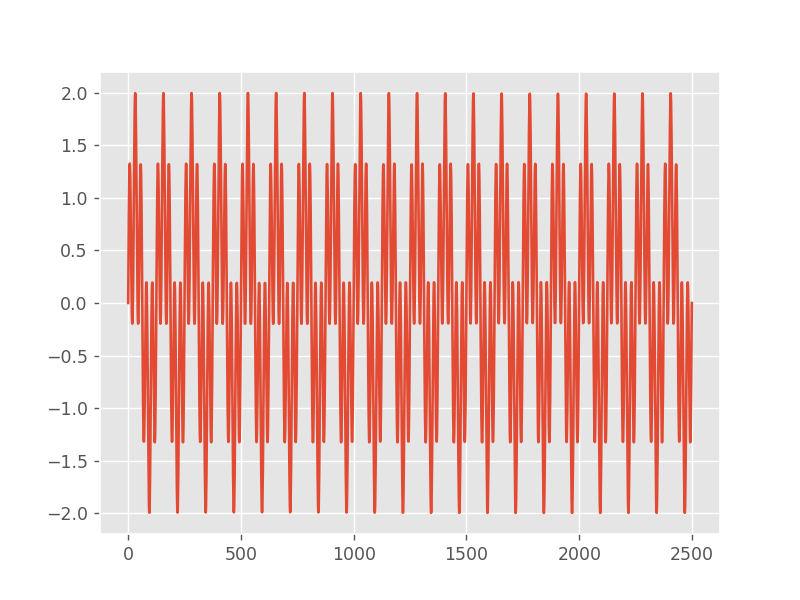

In [11]:
freq1 = 10
freq2 = 2

simSignal1 = np.sin(2 * np.pi * freq1 * np.linspace(0,10,10 * 250))
simSignal2 = np.sin(2 * np.pi * freq1 * np.linspace(0,10,10 * 250)) + np.sin(2 * np.pi * freq2 * np.linspace(0,10,10 * 250))

plt.figure()
plt.plot(simSignal2);

<IPython.core.display.Javascript object>


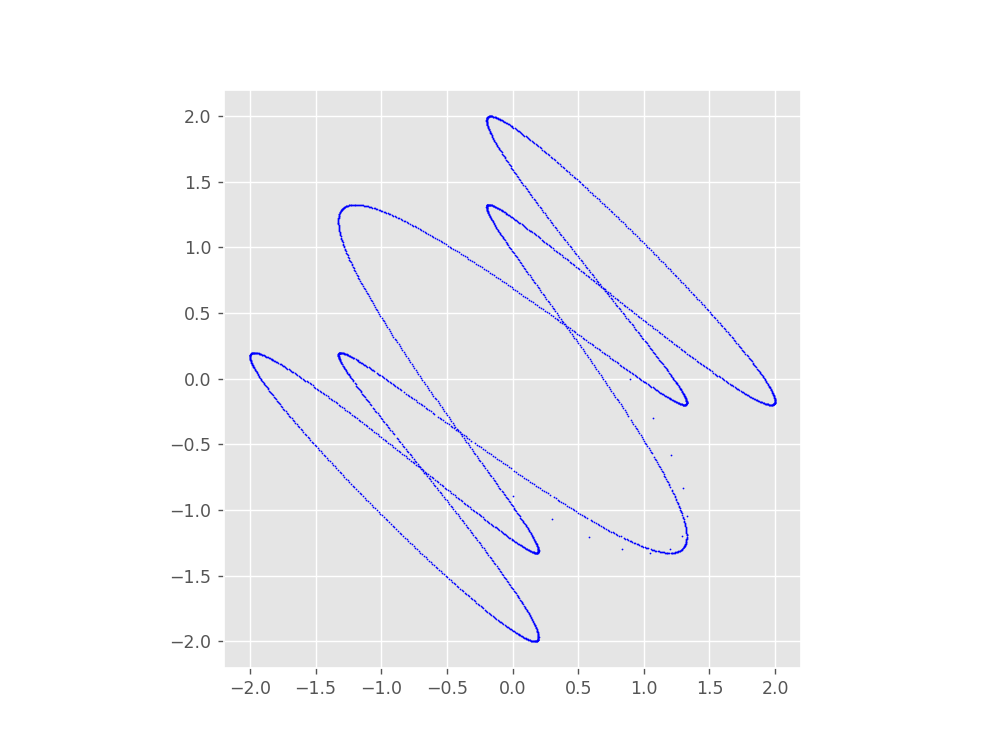

In [9]:
delayInSeconds0 = .1
delayInSeconds1 = 5

dim = 2

if dim==3:
    #embedding = embed3(signal, int(delayInSeconds0 * sfreq), int(delayInSeconds1 * sfreq))
    embedding = embed3(simSignal1, int(.25 * .2 * 250), int(.25 * .1 * 250), )

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = embedding[:,0]
    y = embedding[:,1]
    z = embedding[:,2]

    ax.scatter(x, y, z, c='b', marker='.',s=1)
    #ax.plot(x, y, z, c='b', marker='.')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
elif dim==2:
    #embedding = embed2(signal, int( .25 * .1 * sfreq))
    embedding = embed2(simSignal2, int(.5 * .10 * 250))

    fig = plt.figure()

    x = embedding[:,0]
    y = embedding[:,1]

    plt.scatter(x, y, c='b', marker='.',s=1)
    
    plt.axis('square')


plt.show()

In [10]:
'''

Three states: wake, drowsy, sleep 

Three plots: time, power spectrum, phase plot 

delay embedding as torus (for all three states - to show a limit cycle in wake in 3D, ‘clean’ torus in drowsy state, and noisy torus in sleep)

t1 = 0.1 second (characteristic time of alpha)
t2 = 2 to 5 (look at modulation as a guide)

File 1

1190-1200 (wake)
1200 - 1210 (wake)
656-666 (drowsy)
876-886 (drowsy)
1832-1842 (sleep)

File 2

3806-3818 (wake with eye blinks: eye blinks are approx 2.5 Hz, whereas slow modulation is about <1 Hz, experiment with different t2’s to see if you can identify structure related to eye blinks versus slow modulation)
3192-3206 (drowsy)

'''

'\n\nThree states: wake, drowsy, sleep \n\nThree plots: time, power spectrum, phase plot \n\ndelay embedding as torus (for all three states - to show a limit cycle in wake in 3D, ‘clean’ torus in drowsy state, and noisy torus in sleep)\n\nt1 = 0.1 second (characteristic time of alpha)\nt2 = 2 to 5 (look at modulation as a guide)\n\nFile 1\n\n1190-1200 (wake)\n1200 - 1210 (wake)\n656-666 (drowsy)\n876-886 (drowsy)\n1832-1842 (sleep)\n\nFile 2\n\n3806-3818 (wake with eye blinks: eye blinks are approx 2.5 Hz, whereas slow modulation is about <1 Hz, experiment with different t2’s to see if you can identify structure related to eye blinks versus slow modulation)\n3192-3206 (drowsy)\n\n'